<a href="https://colab.research.google.com/github/Laxmi-Narayana-Chilakala/Stock-price-Prediction/blob/main/Stock_price_model_predictions_model1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from google.colab import files
uploaded = files.upload()

Saving MSFT.csv to MSFT.csv


In [5]:
df=pd.read_csv('/content/MSFT.csv')

In [6]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.061751,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.063956,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.065059,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.063405,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.062302,47894400


In [7]:
df.shape

(8857, 7)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8857 entries, 0 to 8856
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       8857 non-null   object 
 1   Open       8857 non-null   float64
 2   High       8857 non-null   float64
 3   Low        8857 non-null   float64
 4   Close      8857 non-null   float64
 5   Adj Close  8857 non-null   float64
 6   Volume     8857 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 484.5+ KB


In [9]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,8857.000000,8857.000000,8857.000000,8857.000000,8857.000000,8.857000e+03
mean,34.831233,35.209355,34.449657,34.840895,29.886536,5.953411e+07
std,44.060163,44.513443,43.597704,44.080986,44.195101,3.858121e+07
min,0.088542,0.092014,0.088542,0.090278,0.057340,2.304000e+06
25%,3.843750,3.875000,3.812500,3.851563,2.446323,3.559720e+07
50%,26.590000,26.879999,26.290001,26.590000,18.686628,5.269680e+07
75%,36.730000,37.000000,36.110001,36.660000,27.218300,7.339520e+07
max,261.660004,263.190002,260.170013,261.970001,261.970001,1.031789e+09


In [10]:
df['Date']=pd.to_datetime(df['Date'])

In [11]:
df['Date']

0      1986-03-13
1      1986-03-14
2      1986-03-17
3      1986-03-18
4      1986-03-19
          ...    
8852   2021-04-27
8853   2021-04-28
8854   2021-04-29
8855   2021-04-30
8856   2021-05-03
Name: Date, Length: 8857, dtype: datetime64[ns]

In [12]:
#Stock prices starts from
df.Date.min()

Timestamp('1986-03-13 00:00:00')

In [13]:
#Stock prices ends at
df.Date.max()

Timestamp('2021-05-03 00:00:00')

In [14]:
#Total Number of days
(df.Date.max()-df.Date.min()).days

12835

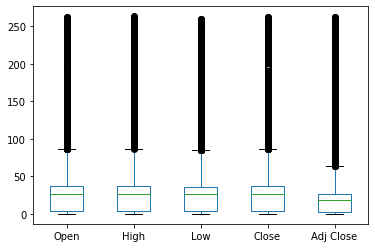

In [15]:
df[df.columns[:-1]].plot(kind='box')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fdc0a1cef50>,
      dtype=object)

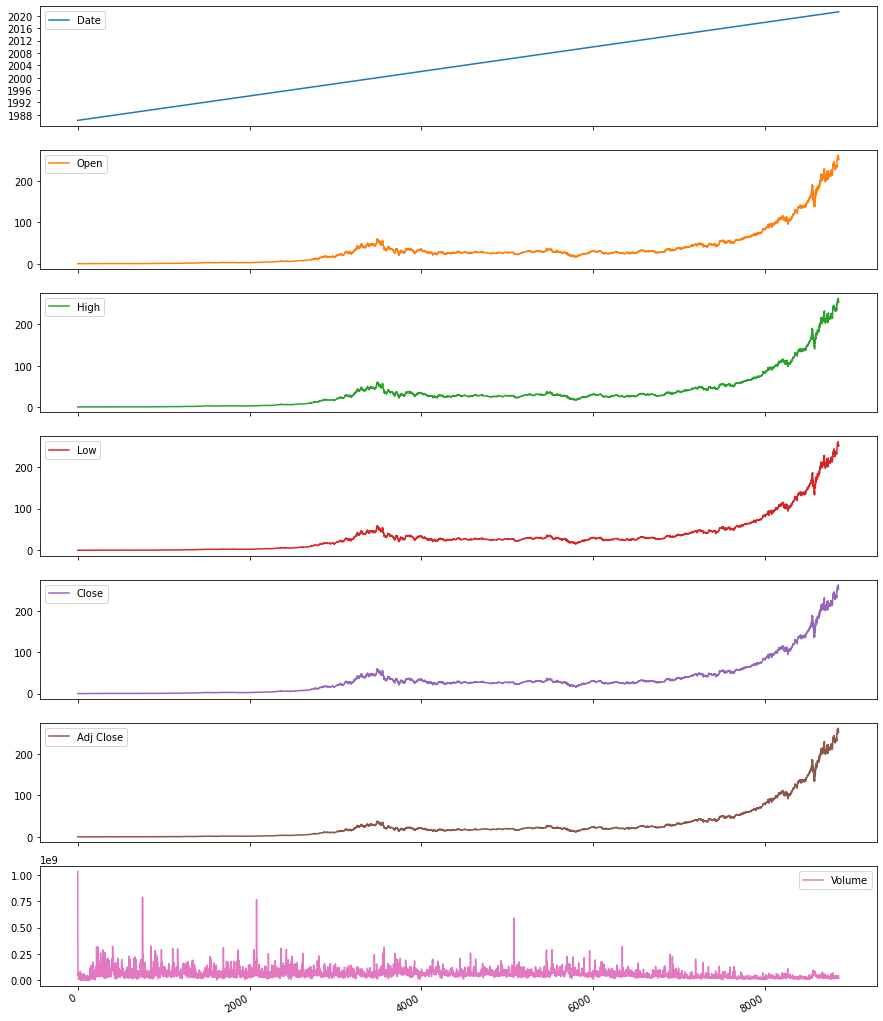

In [16]:
df.plot(subplots=True, figsize=(15, 20))

In [17]:
df1=df.reset_index()['Close']

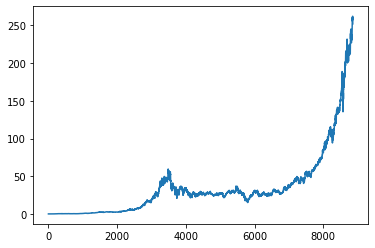

In [18]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [20]:
print(df1)

[[2.65159923e-05]
 [3.97739884e-05]
 [4.64067989e-05]
 ...
 [9.63876521e-01]
 [9.62616393e-01]
 [9.61394489e-01]]


In [21]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [22]:
training_size,test_size

(5757, 3100)

In [23]:
train_data[:10]

array([[2.65159923e-05],
       [3.97739884e-05],
       [4.64067989e-05],
       [3.64594894e-05],
       [2.98304913e-05],
       [1.98869942e-05],
       [9.94349711e-06],
       [0.00000000e+00],
       [6.62899807e-06],
       [1.65724952e-05]])

In [24]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [25]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [26]:
print(X_train.shape), print(y_train.shape)

(5656, 100)
(5656,)


(None, None)

In [27]:
print(X_test.shape), print(ytest.shape)

(2999, 100)
(2999,)


(None, None)

In [28]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [29]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [30]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [32]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
89/89 [==============================] - 12s 29ms/step - loss: 3.6507e-04 - val_loss: 0.0020
Epoch 2/100
89/89 [==============================] - 1s 16ms/step - loss: 3.0890e-05 - val_loss: 0.0024
Epoch 3/100
89/89 [==============================] - 1s 16ms/step - loss: 2.8643e-05 - val_loss: 0.0026
Epoch 4/100
89/89 [==============================] - 1s 16ms/step - loss: 2.7984e-05 - val_loss: 0.0030
Epoch 5/100
89/89 [==============================] - 1s 16ms/step - loss: 2.7443e-05 - val_loss: 0.0025
Epoch 6/100
89/89 [==============================] - 1s 16ms/step - loss: 2.7424e-05 - val_loss: 0.0025
Epoch 7/100
89/89 [==============================] - 1s 16ms/step - loss: 2.1382e-05 - val_loss: 0.0031
Epoch 8/100
89/89 [==============================] - 1s 16ms/step - loss: 2.0880e-05 - val_loss: 0.0030
Epoch 9/100
89/89 [==============================] - 1s 16ms/step - loss: 1.8562e-05 - val_loss: 0.0030
Epoch 10/100
89/89 [==============================] - 1s 16ms/s

In [33]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [34]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [35]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

21.262399464443305

In [36]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

84.1470832825665

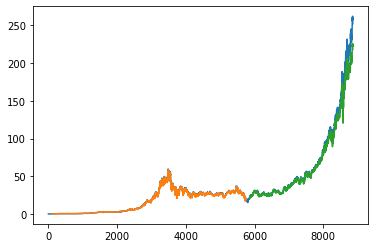

In [39]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

3100